In [ ]:
# YCrCb 색 공간을 이용합니다. (밝기에 상관없이 색을 검출하기 위함입니다.)
#  HSV는 H 값을 이용해서 색상을 표현하기 좋을 때 이용합니다.
#  ROI로 색상 영역을 선택한 뒤 히스토그램을 만듭니다.
#  만든 히스토그램으로 히스토그램 역투영을 합니다.
#  히스토그램 역투영을 마스크로 이용하여 기존 영상과 마스크 연산을 통해 원하는 색을 검출할 수 있습니다.

cv2.calcBackProjection(images, channels, hist, ranges, scale, dst=None) -> dst

• images: 입력 영상 리스트

• channels: 역투영 계산에 사용할 채널 번호 리스트

• hist: 입력 히스토그램 (numpy.ndarray)

• ranges: 히스토그램 각 차원의 최솟값과 최댓값으로 구성된 리스트

• scale: 출력 역투영 행렬에 추가적으로 곱할 값

• dst: 출력 역투영 영상. 입력 영상과 동일 크기, cv2.CV_8U.

In [32]:
import numpy as np
import cv2
import sys 
import matplotlib.pyplot as plt
import os

In [ ]:
# 배경 따내기, 히스토그램 역투영(Histogram backprojection)
src = cv2.imread('./fig/green.png', cv2.IMREAD_REDUCED_COLOR_2)
src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

# REGION OF INTEREST (관심대상)
x, y, w, h = cv2.selectROI(src)
print(x, y, w, h)
# 우리가 선택한 영역(사각형), 
# 다만 numpy좌표를 사용하기때문에 y가 먼저 나온다.
crop = src_ycrcb[y:y+h, x:x+w]

channels = [1, 2]
histSize = [256, 256]
ranges = [0, 256, 0, 256]

# [1, 2] 의미는 cr cb를 뽑아낸다.
hist = cv2.calcHist([crop], channels, None, histSize, ranges)
print(type(hist))
print(hist.shape)


backproj = cv2.calcBackProject([src_ycrcb], channels, hist, ranges, 1)

dst = cv2.copyTo(src, backproj)
cv2.imshow('src', src)
#cv2.imshow('crop', crop)
cv2.imshow('backproj', backproj)
cv2.imshow('dst', dst)


plt.imshow(hist)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
# 배경 따내기, 낙엽
src = cv2.imread('./fig/autumn.jpg', cv2.IMREAD_REDUCED_COLOR_4)
src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

# REGION OF INTEREST (관심대상)
x, y, w, h = cv2.selectROI(src)
print(x, y, w, h)
# 우리가 선택한 영역(사각형), 
# 다만 numpy좌표를 사용하기때문에 y가 먼저 나온다.
crop = src_ycrcb[y:y+h, x:x+w]

channels = [1, 2]
histSize = [256, 256]
ranges = [0, 256, 0, 256]

# [1, 2] 의미는 cr cb를 뽑아낸다.
hist = cv2.calcHist([crop], channels, None, histSize, ranges)
print(type(hist))
print(hist.shape)


backproj = cv2.calcBackProject([src_ycrcb], channels, hist, ranges, 1)

print(backproj)

dst = cv2.copyTo(src, backproj)
cv2.imshow('src', src)
cv2.imshow('crop', crop)
cv2.imshow('backproj', backproj)
cv2.imshow('dst', dst)


plt.imshow(hist)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
# 배경 따내기, 낙엽
src = cv2.imread('./fig/blue_eyes.png', 1)
src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

# REGION OF INTEREST (관심대상)
x, y, w, h = cv2.selectROI(src)
print(x, y, w, h)
# 우리가 선택한 영역(사각형), 
# 다만 numpy좌표를 사용하기때문에 y가 먼저 나온다.
crop = src_ycrcb[y:y+h, x:x+w]

channels = [1, 2]
histSize = [256, 256]
ranges = [0, 256, 0, 256]

# [1, 2] 의미는 cr cb를 뽑아낸다.
hist = cv2.calcHist([crop], channels, None, histSize, ranges)
print(type(hist))
print(hist.shape)


backproj = cv2.calcBackProject([src_ycrcb], channels, hist, ranges, 1)

print(backproj)

dst = cv2.copyTo(src, backproj)
cv2.imshow('src', src)
cv2.imshow('crop', crop)
cv2.imshow('backproj', backproj)
cv2.imshow('dst', dst)


plt.imshow(hist)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
# opencv 함수를 사용하지 않고, back projection을 구현
# 원본 코드 - https://docs.opencv.org/4.0.0/dc/df6/tutorial_py_histogram_backprojection.html
# 수정 - webnautes


roi = cv2.imread('./fig/red.png')
hsv_roi = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)

target = cv2.imread('./fig/color circle_w.jpg')
hsv_target = cv2.cvtColor(target,cv2.COLOR_BGR2HSV)

M = cv2.calcHist([hsv_roi],[0, 1], None, [180, 256], [0, 180, 0, 256] )
I = cv2.calcHist([hsv_target],[0, 1], None, [180, 256], [0, 180, 0, 256] )

R = M/(I+1)


h,s,v = cv2.split(hsv_target)
B = R[h.ravel(), s.ravel()]
B = np.minimum(B, 1)
B = B.reshape(hsv_target.shape[:2])


disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
cv2.filter2D(B, -1, disc, B)
B = np.uint8(B)
cv2.normalize(B, B, 0, 255, cv2.NORM_MINMAX)

ret,thresh = cv2.threshold(B,20,255,0)

thresh = cv2.merge((thresh,thresh,thresh))
res = cv2.bitwise_and(target,thresh)


cv2.imshow("result1", B)
cv2.imshow("result2", res)
cv2.waitKey()
cv2.destroyAllWindows()

In [6]:
# opencv back projection 함수를 사용
# 원본 코드 - https://docs.opencv.org/4.0.0/dc/df6/tutorial_py_histogram_backprojection.html
# 수정 - webnautes

# 원본 코드 - https://docs.opencv.org/4.0.0/dc/df6/tutorial_py_histogram_backprojection.html
# 수정 - webnautes

import cv2 as cv


roi = cv.imread('./fig/red.png')
hsv = cv.cvtColor(roi,cv.COLOR_BGR2HSV)
target = cv.imread('./fig/color circle_w.jpg')
hsvt = cv.cvtColor(target,cv.COLOR_BGR2HSV)

roihist = cv.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )

cv.normalize(roihist,roihist,0,255,cv.NORM_MINMAX)
dst = cv.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)


disc = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
cv.filter2D(dst,-1,disc,dst)

ret,thresh = cv.threshold(dst,20,255,0)
thresh = cv.merge((thresh,thresh,thresh))
res = cv.bitwise_and(target,thresh)

cv.imshow('result1',dst)
cv.imshow('result2',res)
cv.waitKey()
cv.destroyAllWindows()

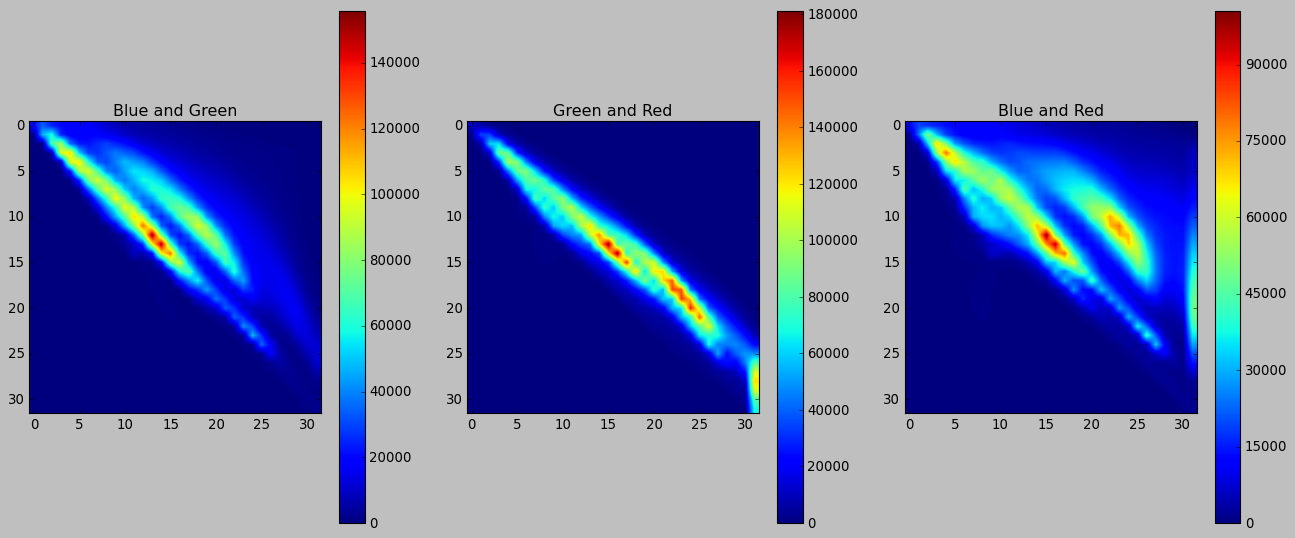

In [10]:
# 2D 히스토그램 (histo_2d.py)

import cv2
import matplotlib.pylab as plt

plt.style.use('classic')            # --①컬러 스타일을 1.x 스타일로 사용
img = cv2.imread('./fig/autumn.jpg')

plt.figure(figsize=(20,8))

plt.subplot(131)
hist = cv2.calcHist([img], [0,1], None, [32,32], [0,256,0,256]) #--②
p = plt.imshow(hist)                                            #--③
plt.title('Blue and Green')                                     #--④
plt.colorbar(p)                                                 #--⑤


plt.subplot(132)
hist = cv2.calcHist([img], [1,2], None, [32,32], [0,256,0,256]) #--⑥
p = plt.imshow(hist)
plt.title('Green and Red')
plt.colorbar(p)

plt.subplot(133)
hist = cv2.calcHist([img], [0,2], None, [32,32], [0,256,0,256]) #--⑦
p = plt.imshow(hist)
plt.title('Blue and Red')
plt.colorbar(p)

plt.show()

In [17]:
# 필터링 
src = cv2.imread('./fig/blue_eyes.png')

# 컨벌루션 작업은 float32로 해줘야 한다.
# 컨벌루션 작업을 할 3 * 3, 5 * 5 사각형을 정의한다.
kernal_3 = np.ones((3, 3), np.float32)/9.
kernal_5 = np.ones((5, 5), np.float32)/25.

# cv2.filter2D(src, ddepth, kernel, dst=None, anchor=None, delta=None, borderType=None) -> dst
# • src : 입력 영상
# • ddepth : 출력 영상 데이터 타입. (e.g) cv2.CV_8U, cv2.CV_32F, cv2.CV_64F, -1을 지정하면 src와 같은 타입의 dst 영상을 생성합니다.
# • kernel: 필터 마스크 행렬. 실수형.
# • anchor: 고정점 위치. (-1, -1)이면 필터 중앙을 고정점으로 사용
# • delta: 추가적으로 더할 값
# • borderType: 가장자리 픽셀 확장 방식
# • dst: 출력 영상
    
dst_3  = cv2.filter2D(src, -1, kernal_3, -1)
dst_5  = cv2.filter2D(src, -1, kernal_5, -1)

# 컨벌루션 작업을 수동으로 하지 않고, opencv에서 제공한 blur로 할 수 있다.
dst_3_blur = cv2.blur(src, (3, 3))
dst_5_blur = cv2.blur(src, (5, 5))

for ksize in (3, 5, 7, 9):
    dst = cv2.blur(src, (ksize, ksize))
    text = '{} x {}'.format(ksize, ksize)
    cv2.putText(dst, text, (30, 30), cv2.FONT_HERSHEY_COMPLEX,
                1, (0, 0, 255), 3, cv2.LINE_AA)
    cv2.imshow('dst', dst)
    cv2.waitKey()

#cv2.waitKey()
cv2.destroyAllWindows()

In [18]:
# 필터링  가우시안 필터
src = cv2.imread('./fig/blue_eyes.png')


dst_blur = cv2.blur(src, (7, 7))
dst_Gaussian = cv2.GaussianBlur(src, (0, 0), 1)

cv2.imshow('src', src)
cv2.imshow('dst_blur', dst_blur)
cv2.imshow('dst_Gaussian', dst_Gaussian)


cv2.waitKey()
cv2.destroyAllWindows()

In [6]:
# 메디안 필터
# 노이즈에 아주 효과적이다.
src = cv2.imread('./fig/blue_eyes.png', cv2.IMREAD_GRAYSCALE)


# 0.001, 0.01 확률로 소금 후추같은 노이즈가 발생
salt_pepper_noise1 = np.random.choice((0, 255), src.shape, p = (0.999, 0.001))
salt_pepper_noise2 = np.random.choice((0, 255), src.shape, p = (0.99, 0.01))
src_noise = src + salt_pepper_noise1 - salt_pepper_noise2
src_noise = np.clip(src_noise, 0, 255).astype(np.uint8)
print(src_noise.dtype)

# medianBlur(src, ksize[, dst]) -> dst
# src : 입력 영상
# ksize : 사각형 필터 크기
dst = cv2.medianBlur(src_noise, 3)

cv2.imshow('src', src)
cv2.imshow('src_noise', src_noise)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

uint8


In [8]:
# 양방향 필터
src = cv2.imread('./fig/blue_eyes.png', cv2.IMREAD_GRAYSCALE)

dst_Gaussian = cv2.GaussianBlur(src, (0, 0), 5.0)

# bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]]) -> dst
# src : 입력 영상
# d : -1로 설정, 필터링에 이용하는 이웃한 픽셀의 지름, 모르면 -1
# sigmaColor : 컬러공간의 시그마공간 정의, 클수록 이웃한 픽셀과 기준색상의 영향이 커진다
# sigmaSpace : 시그마 필터를 조정한다. 값이 클수록 긴밀하게 주변 픽셀에 영향을 미친다. d>0 이면 영향을 받지 않고, 그 외에는 d 값에 비례한다
# borderType : 가장자리 픽셀 확장 방식

dst_bilateral = cv2.bilateralFilter(src, -1, 10, 5.0)

cv2.imshow('src', src)
cv2.imshow('dst_Gaussian', dst_Gaussian)
cv2.imshow('dst_bilateral', dst_bilateral)

cv2.waitKey()
cv2.destroyAllWindows()

In [14]:
# 양방향 필터
# OpenCV에서 대표적인 필터로는 blur, GaussianBlur, medianBlur 
# 그리고 BilateralFilter 가 있다. 이 필터는 선형으로 처리되지 않고, 
# 엣지와 노이즈를 줄여주어 부드러운 영상이 만들어지게 된다. 
# 변수의 값이 크면 클수록 픽셀에 미치는 영향이 많아져 가중치가 커지게 된다.

src = cv2.imread('./fig/image2.jpg', cv2.IMREAD_GRAYSCALE)

dst_Gaussian = cv2.GaussianBlur(src, (0, 0), 5.0)

# bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]]) -> dst
# src : 입력 영상
# d : -1로 설정, 필터링에 이용하는 이웃한 픽셀의 지름, 모르면 -1
# sigmaColor : 색공간의 표준편차
# sigmaSpace : 좌표공간의 표준편차
# borderType : 가장자리 픽셀 확장 방식

dst_bilateral = cv2.bilateralFilter(src, -1, 10, 5.0)
dst_g_b = cv2.bilateralFilter(dst_Gaussian, -1, 10, 5.0)

cv2.imshow('src', src)
cv2.imshow('dst_Gaussian', dst_Gaussian)
cv2.imshow('dst_bilateral', dst_bilateral)
cv2.imshow('dst_g_b', dst_g_b)

cv2.waitKey()
cv2.destroyAllWindows()

In [12]:
src = cv2.imread('./fig/son.jpg')

src_Gaussian = cv2.GaussianBlur(src, (0, 0), 2.0)
edge = 255 - cv2.Canny(src, 100, 200)

cv2.imshow('src',src)
cv2.imshow('src_Gaussian',src_Gaussian)
cv2.imshow('edge',edge)

cv2.waitKey()
cv2.destroyAllWindows()

In [13]:
# 카툰 느낌의 엣지를 추가할 수 있다.
# 윤곽선 추가
src = cv2.imread('./fig/son.jpg')

src_Gaussian = cv2.GaussianBlur(src, (0, 0), 2.0)
edge = 255 - cv2.Canny(src, 100, 200)
edge = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

dst = cv2.bitwise_and(src_Gaussian, edge)

cv2.imshow('src',src)
cv2.imshow('src_Gaussian',src_Gaussian)
cv2.imshow('edge',edge)
cv2.imshow('dst',dst)


cv2.waitKey()
cv2.destroyAllWindows()

In [6]:
# 캐니 엣지를 수작업으로 만든다면 아래와 같이 만들 수 있다.
src = cv2.imread('./fig/son.jpg')

dx = cv2.Sobel(src, cv2.CV_32F, 1, 0, delta = 128)
dy = cv2.Sobel(src, cv2.CV_32F, 0, 1, delta = 128)
mag = np.clip(cv2.magnitude(dx, dy), 0, 255).astype(np.uint8)
_, thres = cv2.threshold(mag, 230, 255, cv2.THRESH_BINARY)

cv2.imshow('src', src)
cv2.imshow('mag', mag)
cv2.imshow('thres', thres)


cv2.waitKey()
cv2.destroyAllWindows()

In [23]:
# 시간 연산 확인
# src = cv2.imread('./fig/image2.jpg')
# ch = cv2.imread('./fig/son.jpg')

# src_Gaussian = cv2.GaussianBlur(src, (0, 0), 5.0)
# edge = 255 - cv2.Canny(src, 50, 200)
# edge = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

# ch_edge = 255 - cv2.Canny(ch, 50, 200)
# ch_edge = cv2.cvtColor(ch_edge, cv2.COLOR_GRAY2BGR)


# mask = cv2.inRange(edge, (350, 520, 0), (80, 255, 255))
# print(edge.shape, ch_edge.shape)

# dst = cv2.bitwise_and(src_Gaussian, edge)
# ch_dst = cv2.bitwise_and(mask, ch_edge)

time = cv2.TickMeter()
time.start()

# 시간 측정할 로직

print(time.getTimeMilli(), 'ms')
time.reset()

# cv2.imshow('src',src)
# cv2.imshow('src_Gaussian',src_Gaussian)
# cv2.imshow('edge',edge)
# cv2.imshow('dst',dst)
# cv2.imshow('ch_dst',ch_dst)



# cv2.waitKey()
# cv2.destroyAllWindows()

0.0 ms


In [28]:
src = cv2.imread('./fig/puppy.bmp')

# cv2.warpAffine(src, M, dsize, dst=None, flags=None, borderMode=None, borderValue=None) -> dst

# • src: 입력 영상
# • M: 2x3 어파인 변환 행렬. 실수형.
# • dsize: 결과 영상 크기. (w, h) 튜플. (0, 0)이면 src와 같은 크기로 설정.
# • dst: 출력 영상
# • flags: 보간법. 기본값은 cv2.INTER_LINEAR.
# • borderMode: 가장자리 픽셀 확장 방식. 기본값은 cv2.BORDER_CONSTANT.
# • borderValue: cv2.BORDER_CONSTANT일 때 사용할 상수 값. 기본값은 0(검정색).
# M= np.array([[1, 0, 0],
#             [0, 1, 0]], dtype = np.float32) # 아무런 이동 없음

# 차원의 좌표를 1차원 증가시켜 표현하는 방법을 동차좌표계라고 한다.
# 동차좌표 사용하는 이유
# - 시점으로 보이는 점들의 위치가 중요한 것이 아닌 시점으로부터의 방향을 알아내기 위해 사용한다.
M= np.array([[1, 0, 100],
            [0, 1, -100]], dtype = np.float32)
dst = cv2.warpAffine(src, M, (0, 0))

cv2.imshow('src', src)
cv2.imshow('dst', dst)



cv2.waitKey()
cv2.destroyAllWindows()

In [34]:
# 확대
src = cv2.imread('./fig/rose.jpg')

dst1 = cv2.resize(src, (1920, 1280), interpolation = cv2.INTER_NEAREST)
dst2 = cv2.resize(src, (1920, 1280), interpolation = cv2.INTER_LINEAR)
dst3 = cv2.resize(src, (1920, 1280), interpolation = cv2.INTER_CUBIC)
dst4 = cv2.resize(src, (1920, 1280), interpolation = cv2.INTER_LANCZOS4)


cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.imshow('dst3', dst3)
cv2.imshow('dst4', dst4)

cv2.waitKey()
cv2.destroyAllWindows()

In [36]:
# 회전 rotation
src = cv2.imread('./fig/puppy.bmp')

# rad = 20*np.pi/180
# M = np.array([[np.cos(rad), np.sin(rad), 0],
#              [-np.sin(rad), np.cos(rad), 0]], dtype = np.float32)

h, w, = src.shape[:2]
cp = (w/2, h/2)

M = cv2.getRotationMatrix2D(cp, 20, 1)

dst = cv2.warpAffine(src, M, (0, 0))
cv2.imshow('src', src)
cv2.imshow('dst', dst)


cv2.waitKey()
cv2.destroyAllWindows()

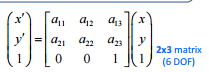

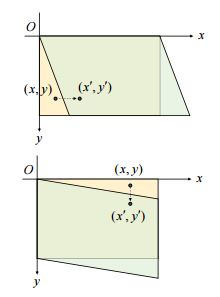

In [73]:
# 밀기

src = cv2.imread('./fig/puppy.bmp')

h, w = src.shape[:2]

M= np.array([[1, 0.5, 0],
            [0, 1, 0]], dtype = np.float32)
M2= np.array([[1, 0, 0],
            [0.5, 1, 0]], dtype = np.float32)
dst = cv2.warpAffine(src, M, (0, 0))
dst2 = cv2.warpAffine(src, M, (w +int(h*0.5), h))  # 밀린 x만큼 캔버스 width를 보정해준다. 
dst3 = cv2.warpAffine(src, M2, (0, 0))
dst4 = cv2.warpAffine(src, M2, (w, (h + int(w*0.5)))) # 밀린 y만큼 캔버스 height를 보정해준다.

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('dst2', dst2)
cv2.imshow('dst3', dst3)
cv2.imshow('dst4', dst4)

cv2.waitKey()
cv2.destroyAllWindows()

In [63]:
# 와프
# 투시 변환 - Perspective transform
src = cv2.imread('./fig/checkerboard.png')

h, w = src.shape[:2]
print(w, h)

src_point = np.array([[217, 50], [691, 47], [830, 517], [67, 526]], dtype = np.float32)
dst_point = np.array([[0, 0],[w-1, 0],[w-1, h-1],[0, h-1]], dtype = np.float32)

pers = cv2.getPerspectiveTransform(src_point, dst_point)
dst = cv2.warpPerspective(src, pers, (w, h))

cv2.imshow('src', src)
cv2.imshow('dst', dst)


cv2.waitKey()
cv2.destroyAllWindows()

960 540


In [65]:
# 물결표시
src = cv2.imread('./fig/bamboo.jpg')

h, w = src.shape[:2]
print(w, h)

# 격자의 인덱스를 나타내는 배열을 돌려줍니다.
map2, map1 = np.indices((h, w), dtype=np.float32)
map1 = map1 + 10 * np.sin(map2/32)

# 출력 영상의 좌표를 입력 영상의 어느 좌표를 참조해서 갖고올 것이냐를 설정
# cv2.remap(src, map1, map2, interpolation, dst=None, borderMode=None, borderValue=None) -> dst
# • src: 입력 영상
# • map1: 결과 영상의 (x, y) 좌표가 참조할 입력 영상의 x좌표. 입력 영상과 크기는 같고, 타입은 np.float32인 numpy.ndarray.
# • map2: 결과 영상의 (x, y) 좌표가 참조할 입력 영상의 y좌표.
# • interpolation: 보간법
# • dst: 출력 영상
# • borderMode: 가장자리 픽셀 확장 방식. 기본값은 cv2.BORDER_CONSTANT.
# • borderValue: cv2.BORDER_CONSTANT일 때 사용할 상수 값. 기본값은 0.

dst = cv2.remap(src, map1, map2, cv2.INTER_CUBIC, borderMode=cv2.BORDER_DEFAULT)
cv2.imshow('src', src)
cv2.imshow('dst', dst)


cv2.waitKey()
cv2.destroyAllWindows()

498 600
